Text classification:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data Extraction:

In [ ]:
txt = pd.read_csv('/content/train.csv')

In [ ]:
txt.shape

(8695, 3)

In [ ]:
txt.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


Text processing:

In [ ]:
df1 = txt[['Comment']]
df1.head()

,Comment
0,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...
2,There are bees
3,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.


Removal emoji:

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', string)

#applying the function
df1['No_Emoji'] = df1['Comment'].apply(lambda x: remove_emoji(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Comment,No_Emoji
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.


Removal punctuation:

In [ ]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df1["Comment_Punctuation"] = df1["No_Emoji"].apply(lambda text: remove_punctuation(text))
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees,there are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal


Removal html attributes:

In [ ]:
def remove_html(text):
    html_pattern = re.compile(r'https?://\S+|www\.\S+')
    return html_pattern.sub(r'', text)

#applying function to the column
df1['Comment_Clean'] = df1['Comment_Punctuation'].apply(lambda x: remove_html(x))
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal


lower casing:

In [ ]:
df1["Comment_Lower"] = df1["Comment_Clean"].str.lower()
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees,there are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal


Sentimental analysis:

In [ ]:
df2 = df1[['Comment_Clean']]
df2.head()

,Comment_Clean
0,A few things You might have negative frequency...
1,Is it so hard to believe that there exist part...
2,There are bees
3,Im a medication technician And thats alot of d...
4,Cesium is such a pretty metal


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data 
df2['Subjectivity'] = df2['Comment_Clean'].apply(getSubjectivity)
df2['Polarity'] = df2['Comment_Clean'].apply(getPolarity)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Comment_Clean,Subjectivity,Polarity
0,A few things You might have negative frequency...,0.493155,0.102712
1,Is it so hard to believe that there exist part...,0.543056,-0.218056
2,There are bees,0.000000,0.000000
3,Im a medication technician And thats alot of d...,0.550000,0.033333
4,Cesium is such a pretty metal,0.750000,0.125000


In [ ]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df2['Sentiment'] = df2['Polarity'].apply(getSentiment)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Comment_Clean,Subjectivity,Polarity,Sentiment
0,A few things You might have negative frequency...,0.493155,0.102712,Positive
1,Is it so hard to believe that there exist part...,0.543056,-0.218056,Negative
2,There are bees,0.000000,0.000000,Neutral
3,Im a medication technician And thats alot of d...,0.550000,0.033333,Positive
4,Cesium is such a pretty metal,0.750000,0.125000,Positive


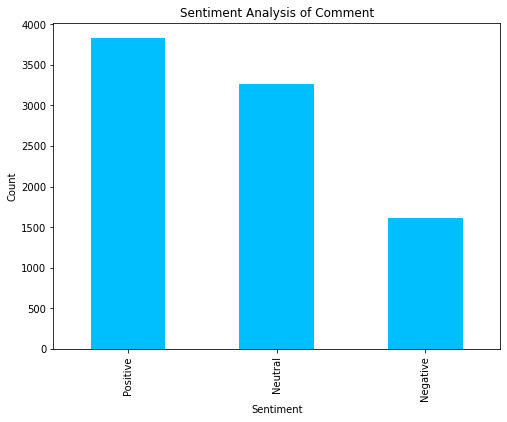

In [ ]:
plt.figure(figsize = (8,6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
df2['Sentiment'].value_counts().plot(kind = 'bar', color = 'deepskyblue')
plt.title("Sentiment Analysis of Comment")
plt.show()

In [ ]:
join = (df2['Comment_Clean'], df2['Sentiment'])
df3 = pd.concat(join, axis = True)
df3.head()

,Comment_Clean,Sentiment
0,A few things You might have negative frequency...,Positive
1,Is it so hard to believe that there exist part...,Negative
2,There are bees,Neutral
3,Im a medication technician And thats alot of d...,Positive
4,Cesium is such a pretty metal,Positive


In [ ]:
df3['Sentiment'] = df3['Sentiment'].astype('category')
print(df3.dtypes)

Comment_Clean      object
Sentiment        category
dtype: object


In [ ]:
df3['Sentiment'] = df3['Sentiment'].cat.codes
df3.head()

,Comment_Clean,Sentiment
0,A few things You might have negative frequency...,2
1,Is it so hard to believe that there exist part...,0
2,There are bees,1
3,Im a medication technician And thats alot of d...,2
4,Cesium is such a pretty metal,2


In [ ]:
#split data
X = df3.drop('Sentiment', axis = 1)
y = df3['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6086, 1)
(6086,)
(2609, 1)
(2609,)


In [ ]:
def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

#applying function feature scaling
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train['Comment_Clean'])
X_train = vectorize(X_train['Comment_Clean'], tfidf_vect_fit)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Random forest model:

In [ ]:
#build model
rf = RandomForestClassifier()
%time rf.fit(X_train, y_train)
score = cross_val_score(rf, X_train, y_train.values.ravel(), cv = 5) 
print(score)
score.mean()

CPU times: user 50.8 s, sys: 271 ms, total: 51.1 s
Wall time: 50.7 s
[0.72988506 0.72637634 0.72966311 0.71815941 0.73623665]


0.7280641109190681

In [ ]:
#prediction
X_test = vectorize(X_test['Comment_Clean'], tfidf_vect_fit)
y_pred = rf.predict(X_test)
print(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[1 2 1 ... 0 2 2]


In [ ]:
#report of MSE, MAE, RMSE
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : '+ str(mae))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.5316213108470679
Mean Absolute Error : 0.3499425067075508
Root Mean Squared Error : 0.7291236595030145


[[  90  140  234]
 [   0  840  105]
 [   3  194 1003]]


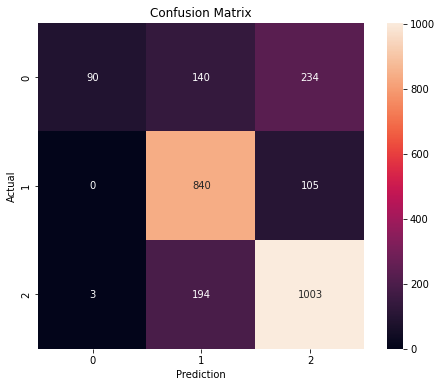

In [ ]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = '.0f', square = True)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.19      0.32       464
           1       0.72      0.89      0.79       945
           2       0.75      0.84      0.79      1200

    accuracy                           0.74      2609
   macro avg       0.81      0.64      0.64      2609
weighted avg       0.78      0.74      0.71      2609



Checking feature importance

In [ ]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

thanks                  0.015903
the                     0.013872
more                    0.013543
good                    0.010042
is                      0.009885
                          ...   
drugexcipientvehicle    0.000000
drugnncurrent           0.000000
punctuated              0.000000
drury                   0.000000
representing            0.000000
Length: 16696, dtype: float64


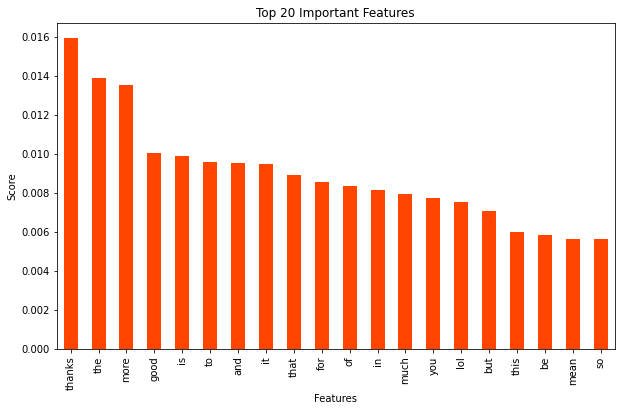

In [ ]:
feature.nlargest(20).plot(kind = 'bar',figsize = (10,6), color = 'orangered')
plt.title("Top 20 Important Features")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

visualise topic

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


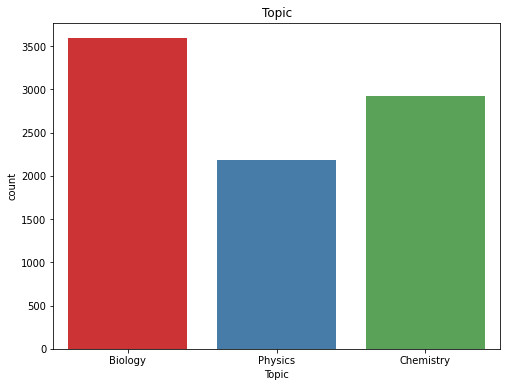

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(txt['Topic'], palette = 'Set1')
plt.title("Topic")
plt.show()

In [ ]:
#selection data
join = (txt['Topic'], df2['Sentiment'])
df4 = pd.concat(join, axis = True)
df4.head()

,Topic,Sentiment
0,Biology,Positive
1,Physics,Negative
2,Biology,Neutral
3,Biology,Positive
4,Chemistry,Positive


In [ ]:
#group topic & sentiment
topic_sentiment = df4.groupby(['Topic', 'Sentiment']).size().reset_index(name = 'Count')
print(topic_sentiment)

       Topic Sentiment  Count
0    Biology  Negative    741
1    Biology   Neutral   1350
2    Biology  Positive   1500
3  Chemistry  Negative    525
4  Chemistry   Neutral   1076
5  Chemistry  Positive   1319
6    Physics  Negative    345
7    Physics   Neutral    833
8    Physics  Positive   1006


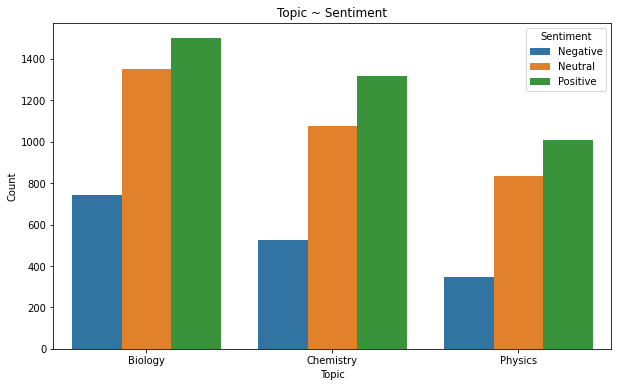

In [ ]:
#visualize topic ~ sentiment
plt.figure(figsize = (10,6))
sns.barplot(x = 'Topic', y = 'Count', hue = 'Sentiment', data = topic_sentiment)
plt.title("Topic ~ Sentiment")
plt.show()